# The Sparks Foundation

## Data Science and Business Analytics (Task-3)

### Exploratory Data Analysis - Retail

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?



● Dataset: https://bit.ly/3i4rbWl



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Analyzing null or missing values and duplicated values in dataset

In [5]:
df.shape

(9994, 13)

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.shape

(9977, 13)

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
 df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Conclusion : No null or missing values present in the dataset.

# Summary Statistics of dataset

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Analyzing columns and their data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Separating numerical and categorical columns

In [13]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

In [14]:
numerical_columns

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [15]:
categorical_columns

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [16]:
categorical_df = df[categorical_columns]

categorical_df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [17]:
numerical_df = df[numerical_columns]

numerical_df.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


# Handling Categorical variables

In [18]:
categorical_columns

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

# Checking how many unique categories are present in each of the Categorical variables

In [19]:
len(df['Ship Mode'].unique()),len(df['Segment'].unique()),len(df['Country'].unique()),len(df['City'].unique()) ,len(df['State'].unique()),len(df['Category'].unique()),len(df['Sub-Category'].unique())

(4, 3, 1, 531, 49, 3, 17)

#### Country variable has only 1 category , while City and State have 531 and 49 categories respectively .

#### So we will not make count plot of these variables.

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

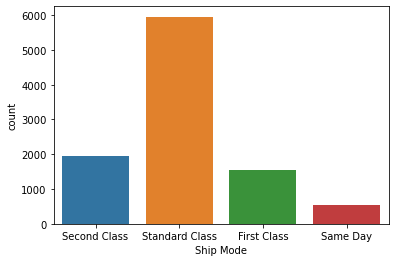

In [20]:
sns.countplot(df['Ship Mode'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

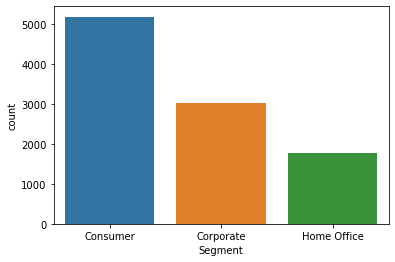

In [21]:
sns.countplot(df['Segment'])

<AxesSubplot:xlabel='Region', ylabel='count'>

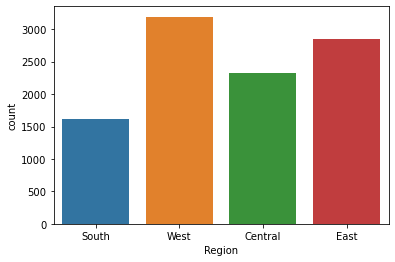

In [22]:
sns.countplot(df['Region'])

<AxesSubplot:xlabel='Category', ylabel='count'>

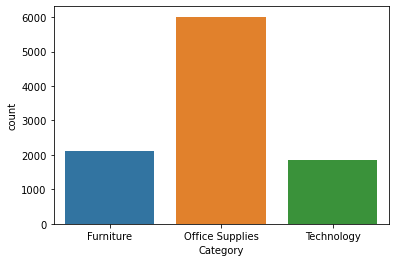

In [23]:
sns.countplot(df['Category'])

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

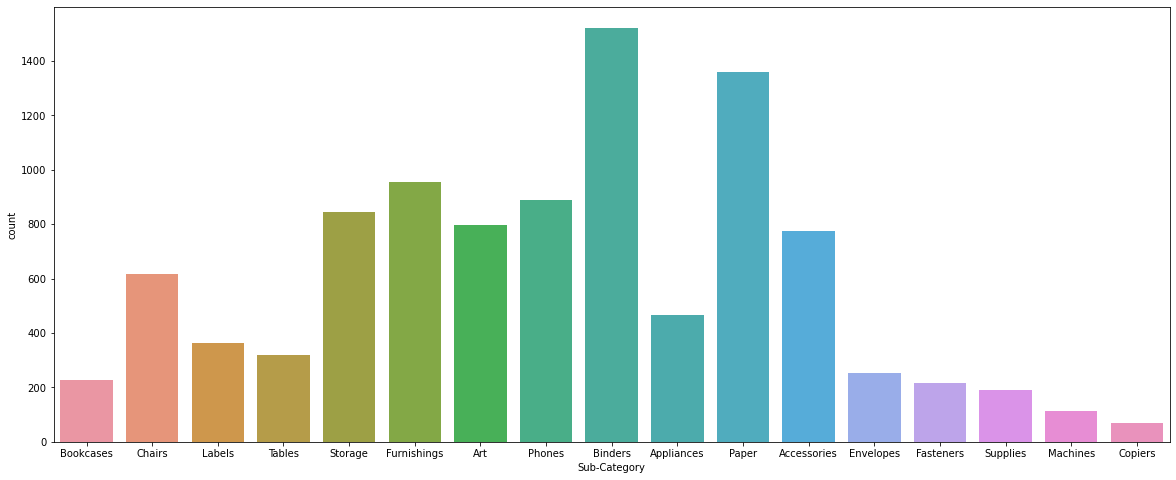

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])

# Handling Numerical variables

In [26]:
numerical_columns

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [27]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

**We can see Quantity is actually discrete numerical variable.**

#### Here we have not analyzed Quantity as it has finite whole number values and Postal code as it is actually numerical categorical entity.

<AxesSubplot:>

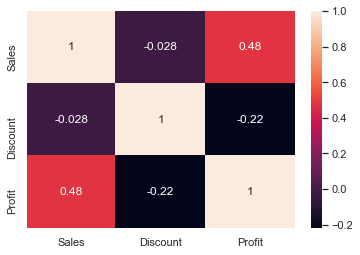

In [25]:
sns.heatmap(df[['Sales','Discount','Profit']].corr(),annot=True)

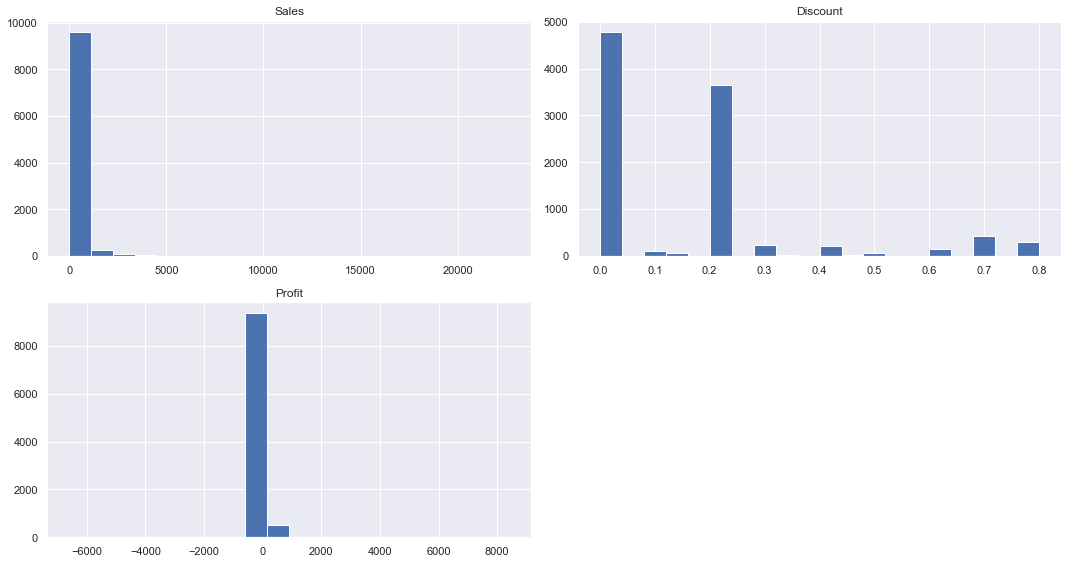

In [26]:
df[['Sales','Discount','Profit']].hist(bins = 20,figsize = (15,8)) 
plt.tight_layout()
plt.show()

# Removing outliers in Numerical values using z-score 

In [27]:
df1 = df.copy()

### Outlier Treatment using z-score

In [28]:
from scipy.stats import zscore

df1 = df.copy()

df1['Sales_zs'] = zscore(df1['Sales'])    
df1['Discount_zs'] = zscore(df1['Discount'])   
df1['Profit_zs'] = zscore(df1['Profit'])   

### Outlier-free Regions of Numerical variables

<AxesSubplot:xlabel='Sales'>

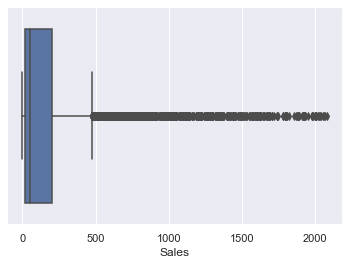

In [29]:
sns.boxplot(df1[(df1['Sales_zs']>-3)&(df1['Sales_zs']<3)]['Sales'])

<AxesSubplot:xlabel='Discount'>

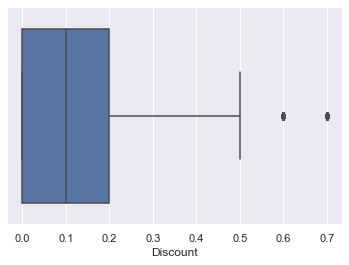

In [30]:
sns.boxplot(df1[(df1['Discount_zs']>-3)&(df1['Discount_zs']<3)]['Discount'])

<AxesSubplot:xlabel='Profit'>

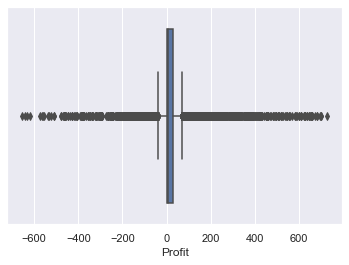

In [31]:
sns.boxplot(df1[(df1['Profit_zs']>-3)&(df1['Profit_zs']<3)]['Profit'])

# Analyzing 'Profit' for Different Categorical Features with Bar plot

<AxesSubplot:ylabel='Ship Mode'>

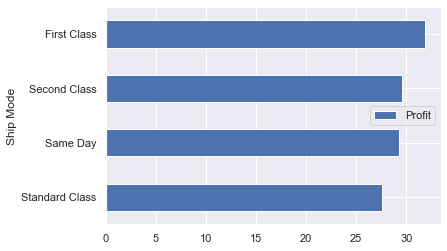

In [32]:
df1.groupby('Ship Mode')['Profit'].mean().sort_values().plot(kind='barh',legend='Profit')

<AxesSubplot:ylabel='Segment'>

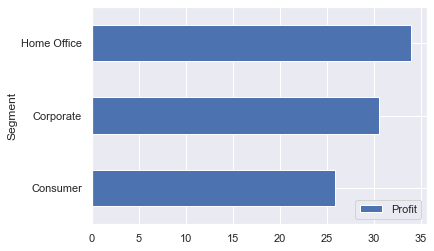

In [33]:
df.groupby('Segment')['Profit'].mean().sort_values().plot(kind='barh',legend='Profit')

<AxesSubplot:ylabel='Region'>

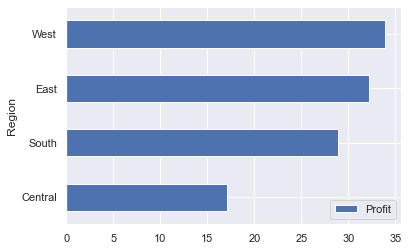

In [34]:
df.groupby('Region')['Profit'].mean().sort_values().plot(kind='barh',legend='Profit')

<AxesSubplot:ylabel='Category'>

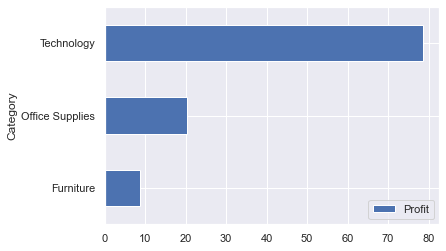

In [35]:
df.groupby('Category')['Profit'].mean().sort_values().plot(kind='barh',legend='Profit')

<AxesSubplot:ylabel='Sub-Category'>

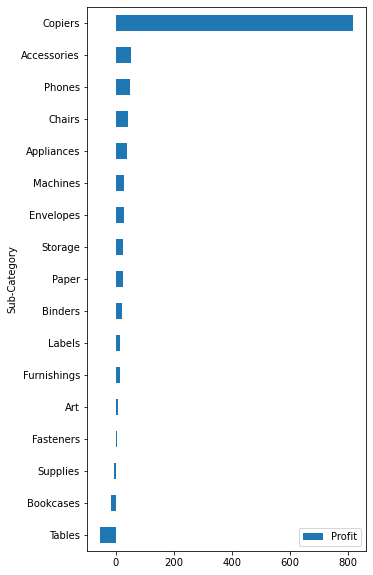

In [19]:
df.groupby('Sub-Category')['Profit'].mean().sort_values().plot(kind='barh',figsize=(5,10),legend='Profit')

# Analyzing 'Sales' for Different Categorical Features with Pie chart

<AxesSubplot:ylabel='Sales'>

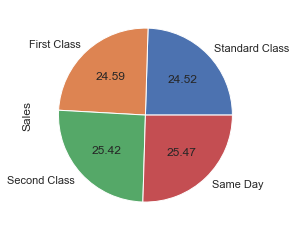

In [110]:
df.groupby('Ship Mode')['Sales'].mean().sort_values().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Sales'>

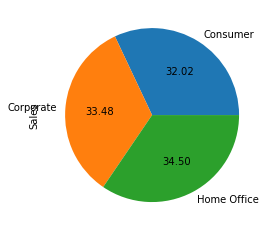

In [21]:
df.groupby('Segment')['Sales'].mean().sort_values().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Sales'>

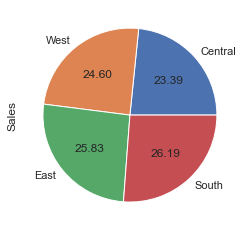

In [39]:
df.groupby('Region')['Sales'].mean().sort_values().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Sales'>

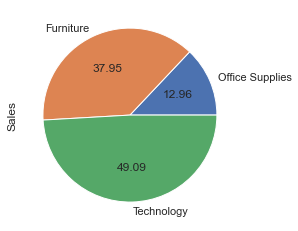

In [40]:
df.groupby('Category')['Sales'].mean().sort_values().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Sales'>

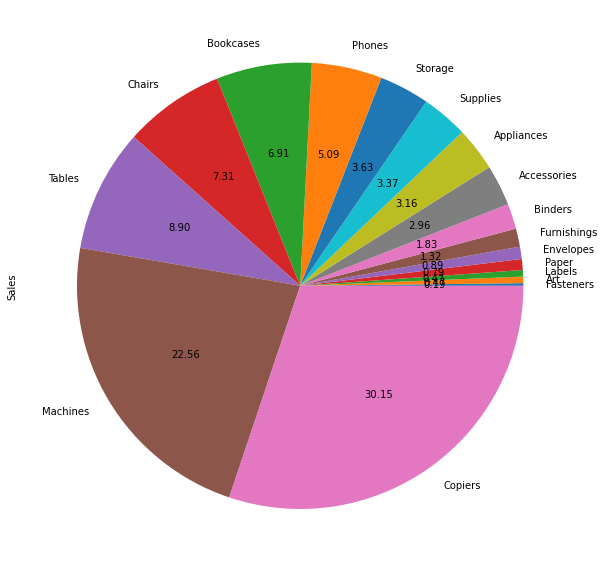

In [25]:
df.groupby('Sub-Category')['Sales'].mean().sort_values().plot(kind='pie',autopct='%.2f',figsize=(10,15))

# Profit and Loss Analysis

<AxesSubplot:>

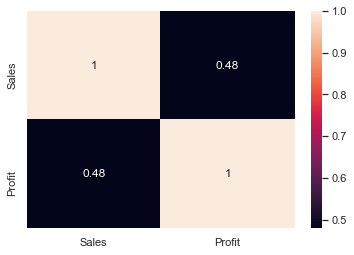

In [44]:
sns.heatmap(df[['Sales','Profit']].corr().abs(),annot=True)

In [26]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [28]:
print('Total % of instances when business made profit :',round(len(df[df['Profit']>0]['Profit'])/len(df)*100,2),'%'  )

Total % of instances when business made profit : 80.62 %


In [29]:
print('Total % of instances when business made loss :',round(len(df[df['Profit']<0]['Profit'])/len(df)*100,2),'%' )

Total % of instances when business made loss : 18.73 %


#### Conclusion : As we can see from the dataset, around 18.72% instances the business faced loss.
#### It is reccommended to minimize this loss as much as possible.

# Sales vs Profit 

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

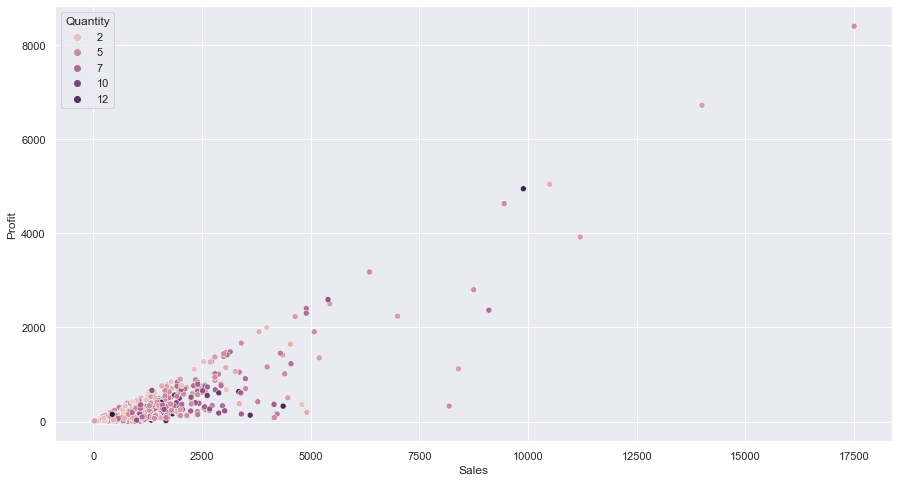

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Sales'],df[df['Profit']>0]['Profit'],hue=df['Quantity'])

# Sales vs Loss

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

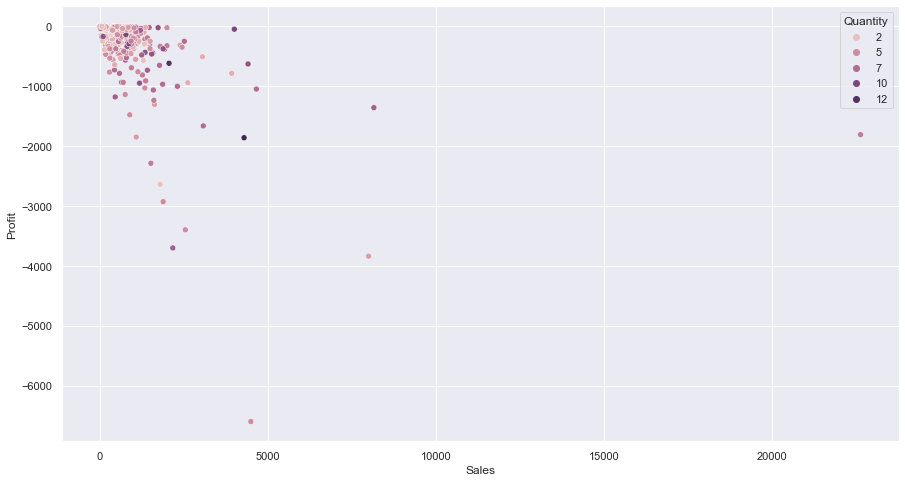

In [77]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Sales'],df[df['Profit']<0]['Profit'],hue=df['Quantity'])

### We can see both Profit and Loss is linearly increasing with Sales

# Profit and Loss for Different Quantities in Different Regions

In [49]:
df_profit = df[df['Profit']>0]

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

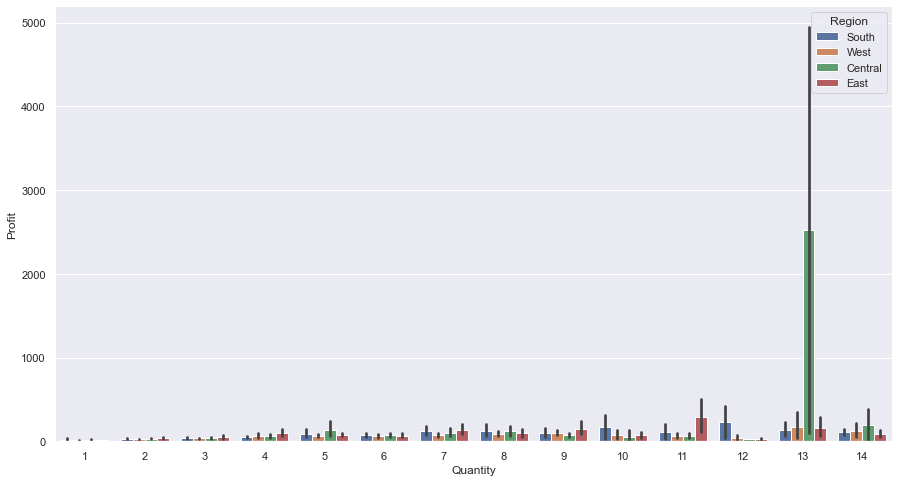

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(df_profit['Quantity'],df_profit['Profit'],hue=df['Region'])

### Conclusion:

#### Central region with 13 as qauntity is most profitable

In [51]:
df_loss = df[df['Profit']<0]

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

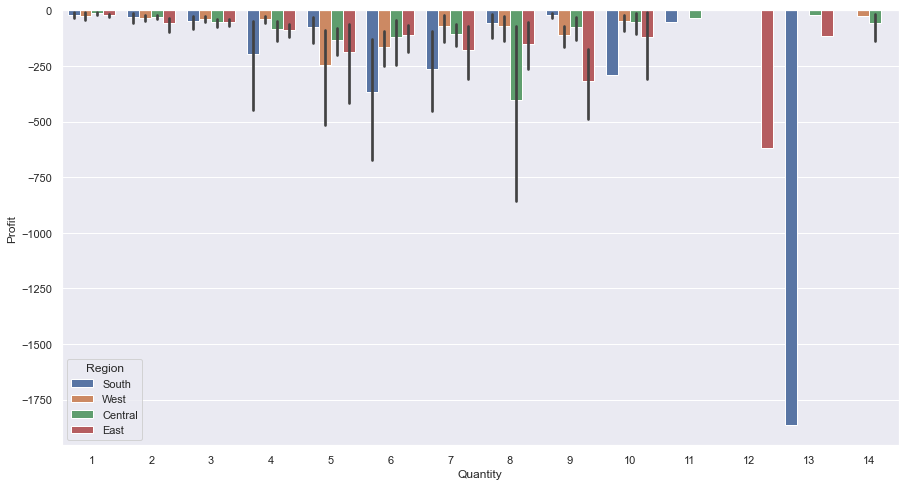

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(df_loss['Quantity'],df_loss['Profit'],hue=df['Region'])

### Conclusion :

#### South Region with quantity as 13 is most lossy. 

# Analyzing Profitable aspects in Business

In [53]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### How Profit is ditributed according to different Categorical variables

#### Average profit in different Ship Modes

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

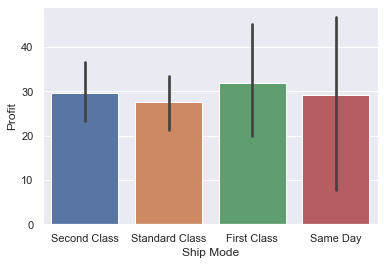

In [54]:
 sns.barplot(data= df, x='Ship Mode',y='Profit')

#### Average profit in different Segments

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

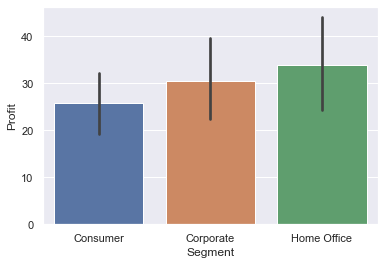

In [55]:
 sns.barplot(data= df, x='Segment',y='Profit')

#### Average profit in different Regions

<AxesSubplot:xlabel='Region', ylabel='Profit'>

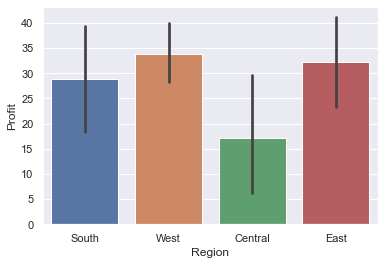

In [56]:
 sns.barplot(data= df, x='Region',y='Profit')

#### Average profit in different Categories

<AxesSubplot:xlabel='Category', ylabel='Profit'>

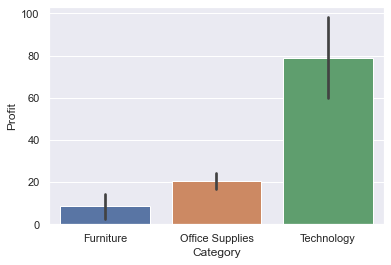

In [57]:
 sns.barplot(data= df, x='Category',y='Profit')

#### Average profit in different Sub-Categories

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

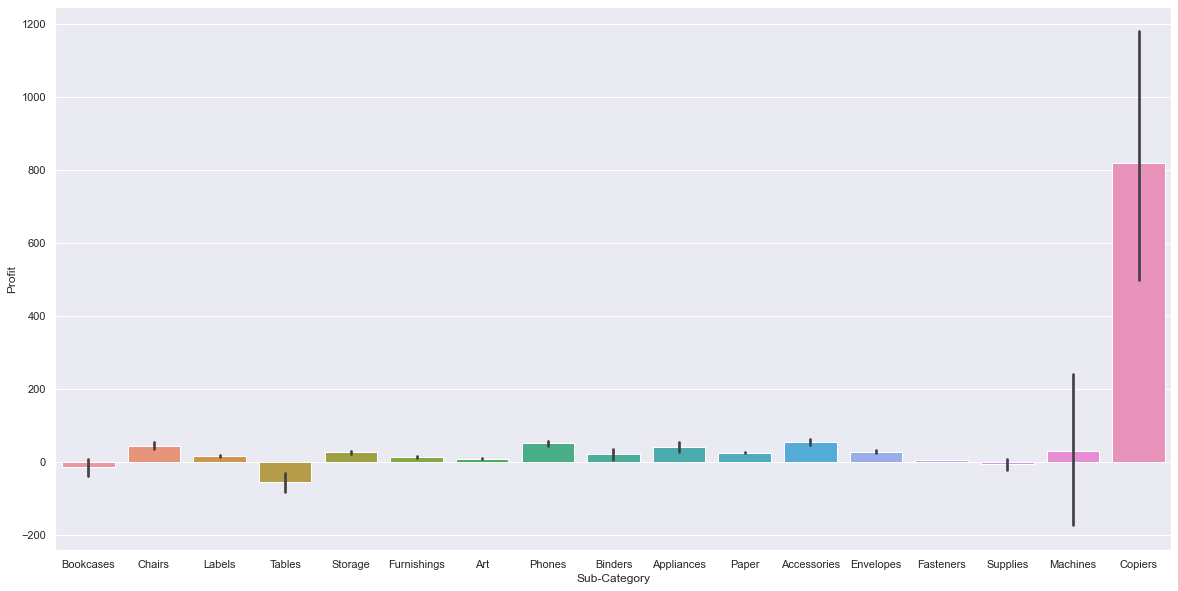

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(data= df, x='Sub-Category',y='Profit')

### How Sales is ditributed according to different Categorical variables

#### Average sales in different Ship Mode

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

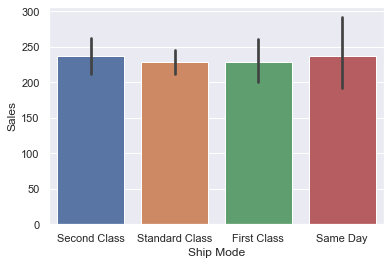

In [59]:
 sns.barplot(data= df, x='Ship Mode',y='Sales')

#### Average sales in different Segments

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

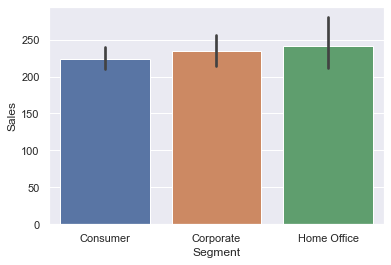

In [60]:
 sns.barplot(data= df, x='Segment',y='Sales')

#### Average sales in different Regions

<AxesSubplot:xlabel='Region', ylabel='Sales'>

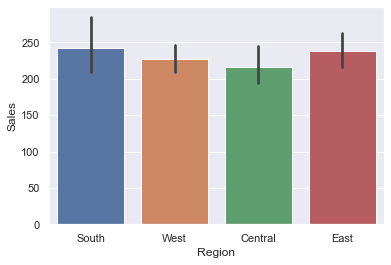

In [61]:
 sns.barplot(data= df, x='Region',y='Sales')

#### Average sales in different Categories

<AxesSubplot:xlabel='Category', ylabel='Sales'>

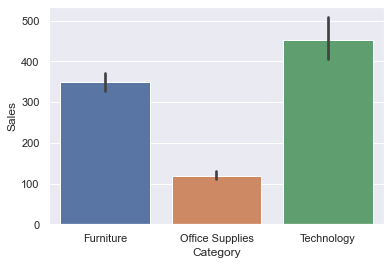

In [62]:
 sns.barplot(data= df, x='Category',y='Sales')

#### Average sales in different Sub-Categories

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

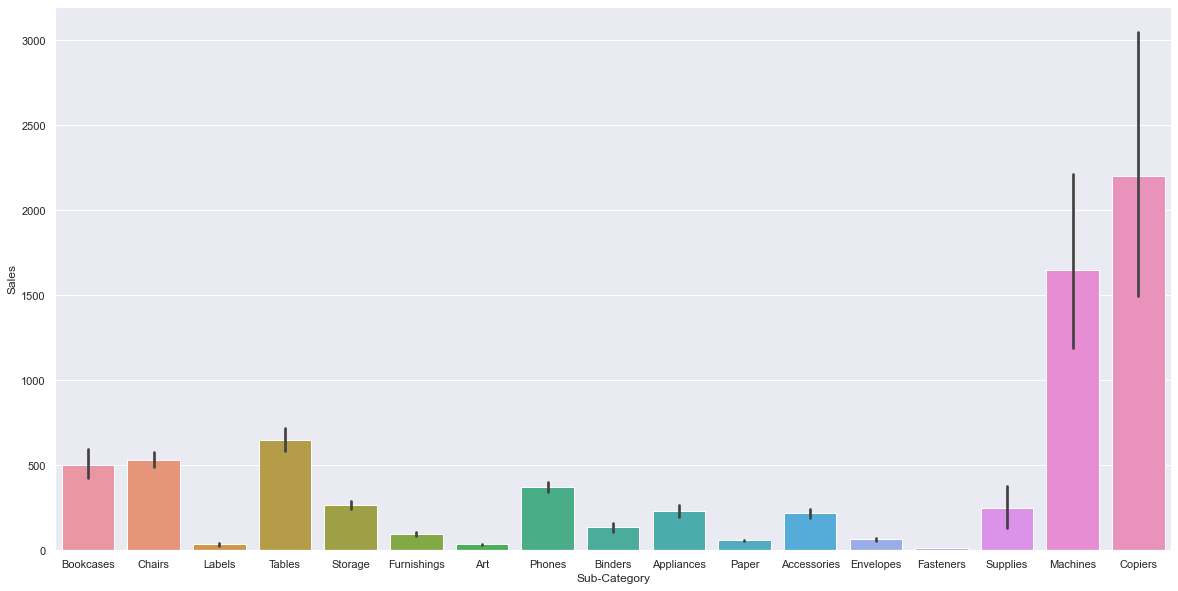

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(data= df, x='Sub-Category',y='Sales')

### Conclusions:
#### As we saw earlier that sales and profit has positive moderately strong correlation, 
#### and from the above graphs as well we can infer Sales and Profit are proportional.

#### However,some of the aspects needed to be taken care:

##### We can see Machines, Tables, Bookcases, Chairs,Storage,Phones etc these are predominanatly have moderate  amount of sales but Machines are not that much of profitable as sales and bookcases ,tables these are proven ahving loss in business. So this has to be taken care of.


<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

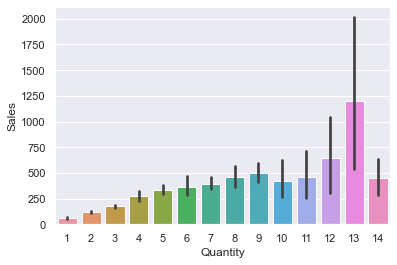

In [64]:
sns.barplot(df['Quantity'],df['Sales'])

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

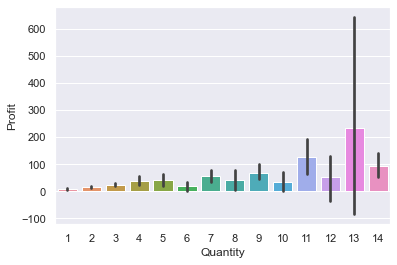

In [65]:
sns.barplot(df['Quantity'],df['Profit'])

### Conclusions:

#### We can see that when there is order quantity of 13 , it is proven to be most profitable and has high amount of sales.

# Some additional Multi-variate Analysis

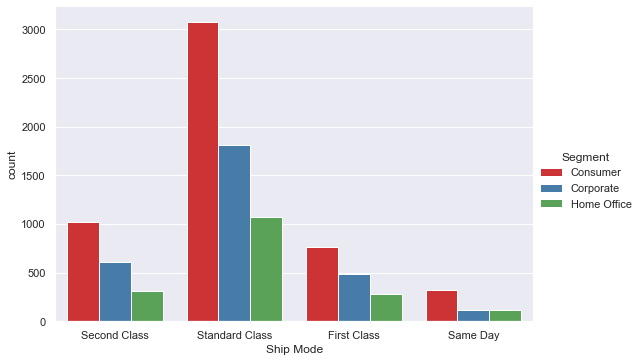

In [67]:
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=1.5, palette="Set1")

#### We can see 'Standard class; ship mode is dominating in terms of count and within each category 'Consumer' segment is dominating with respect to count.

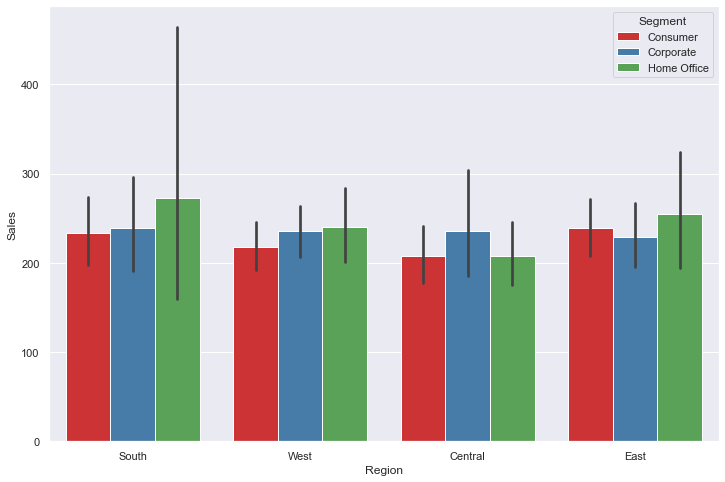

In [69]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=df, palette="Set1")

#### Here in the above count plot we get and idea of how average sales is varying with each region and segment

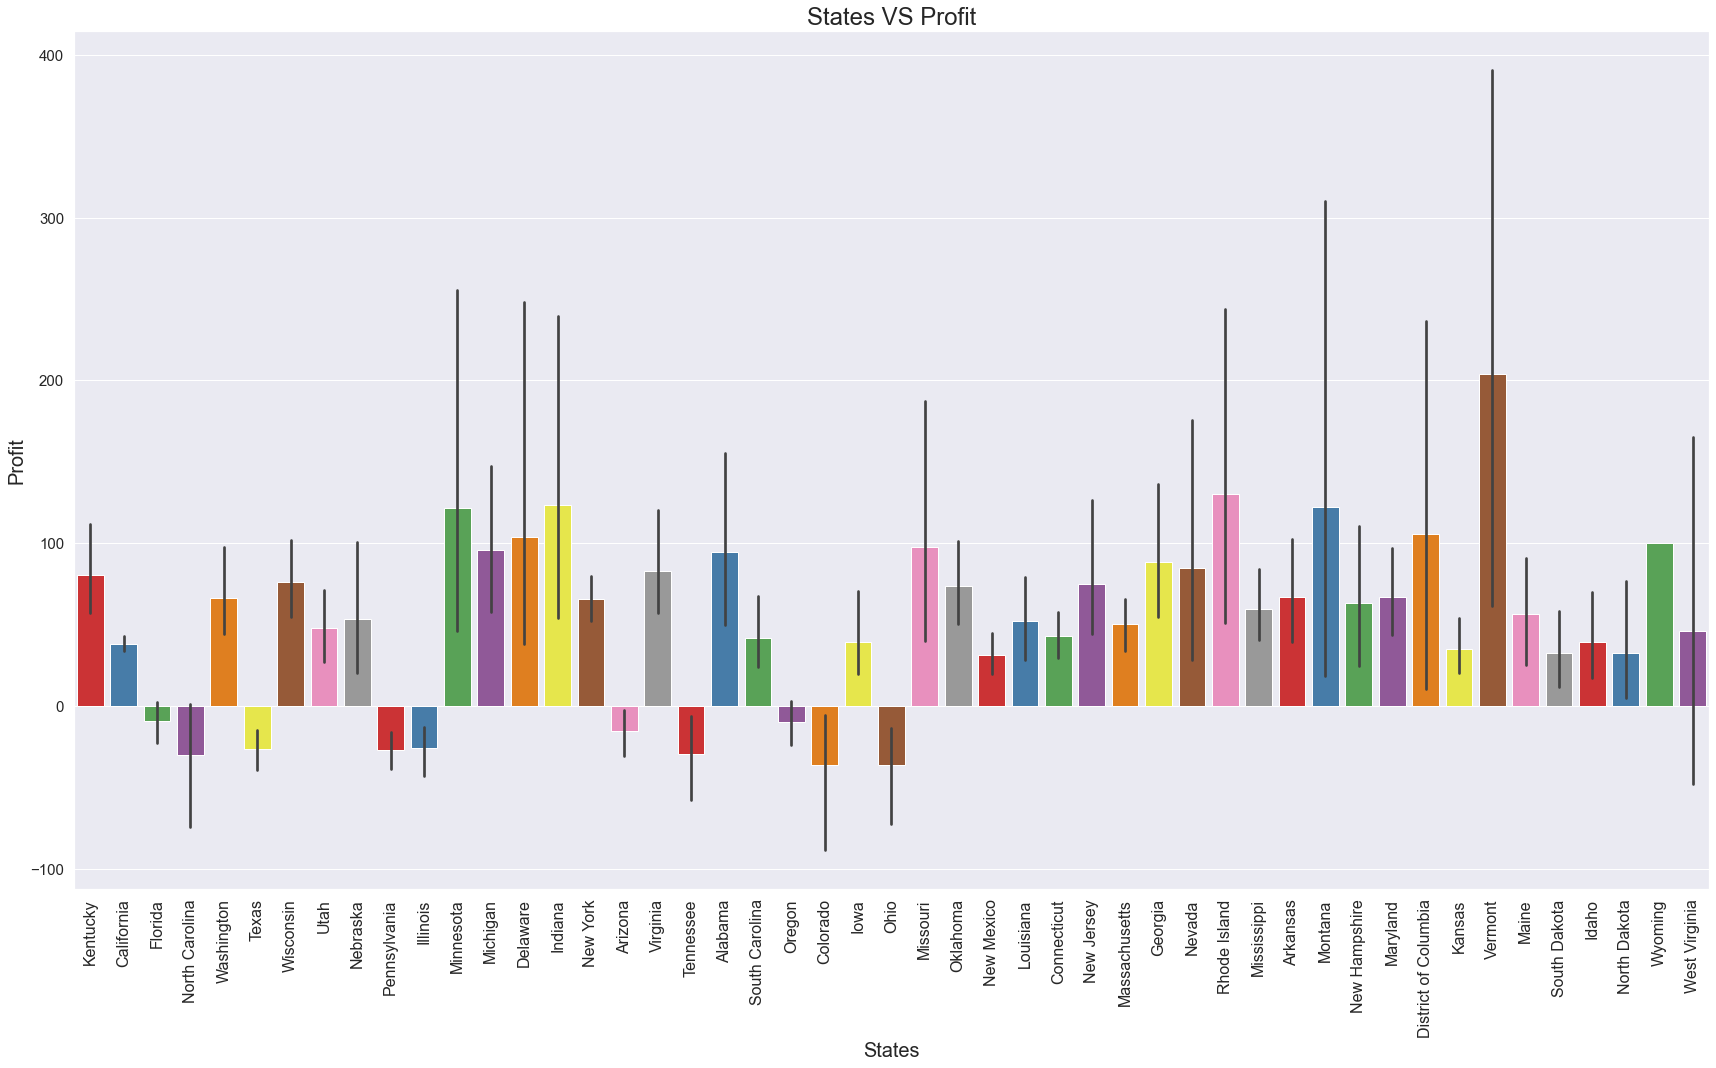

In [70]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=df, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

#### Above barplot signifies how statewise average Profits are varying.

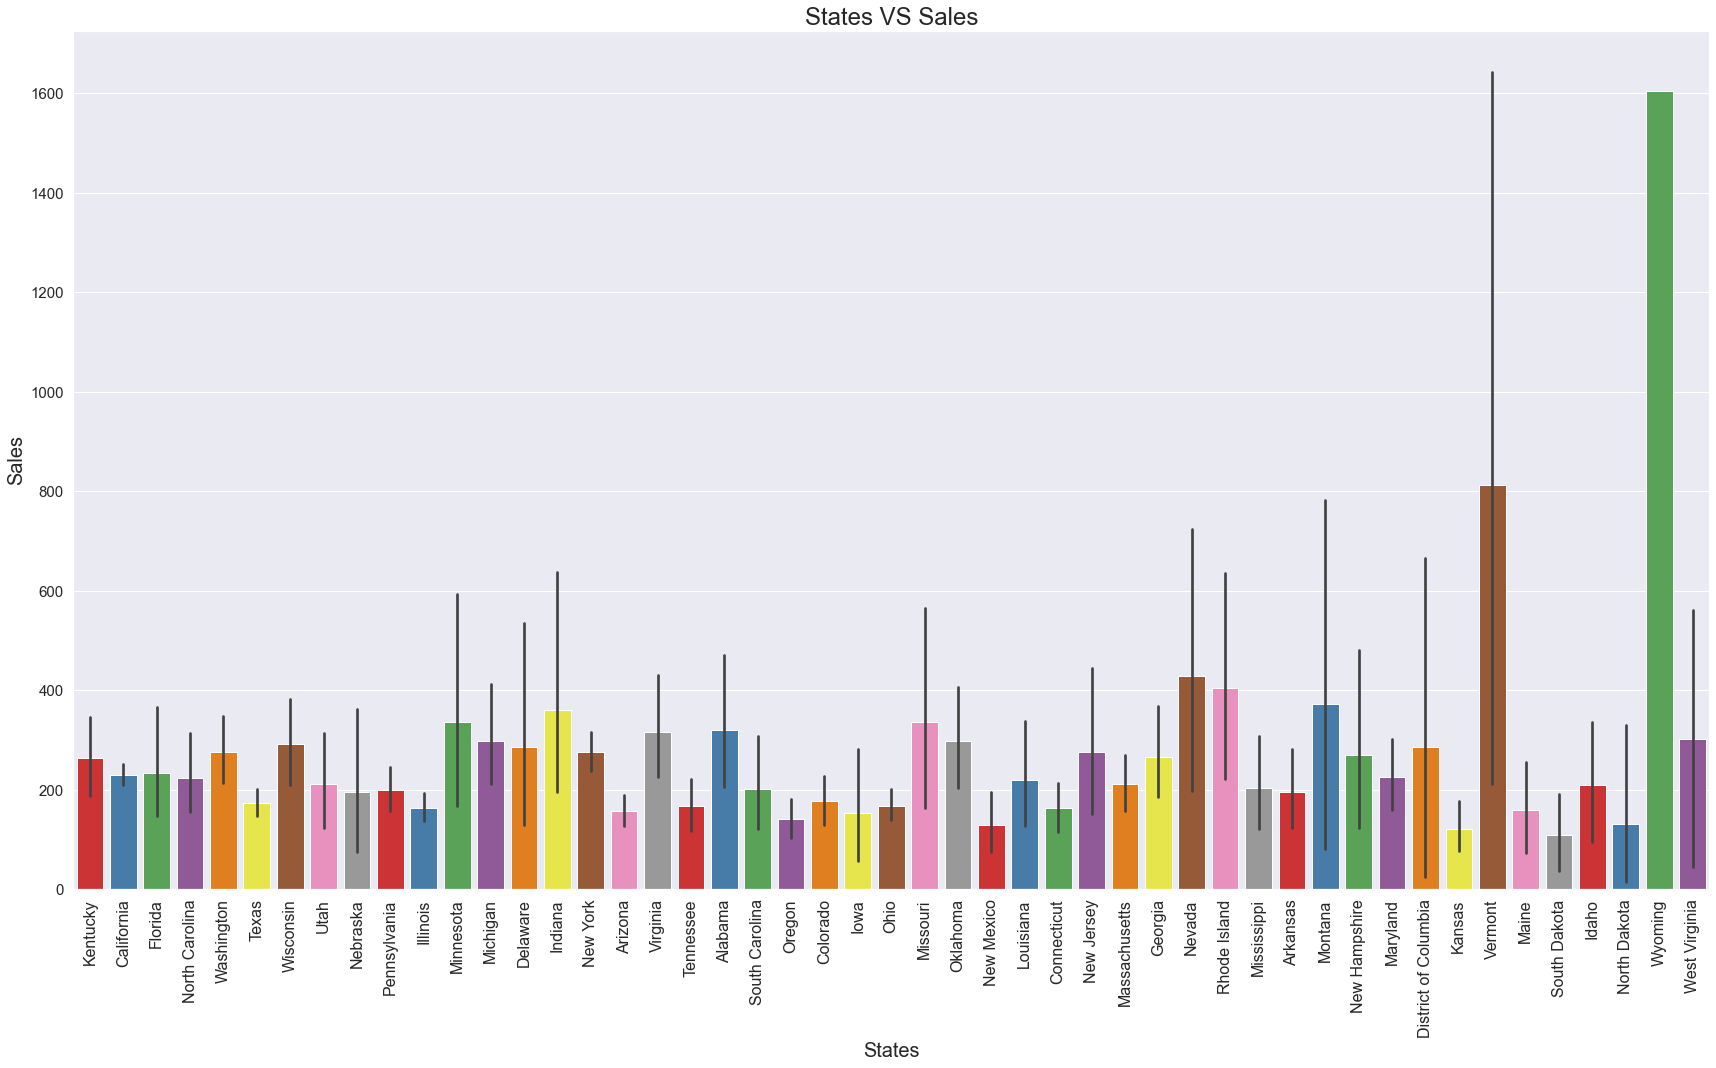

In [72]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Sales", data=df, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Sales",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.tight_layout()

#### Above barplot signifies how statewise average Sales are varying.

Text(0, 0.5, 'Profit')

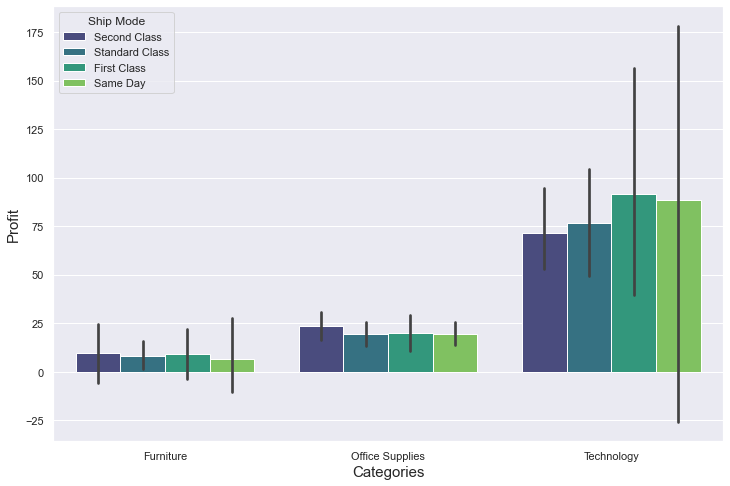

In [75]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit",hue="Ship Mode", data=df, palette="viridis")
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

#### Above figure displays Average Profits in different Categories and Ship Mode.

Text(0, 0.5, 'Sales')

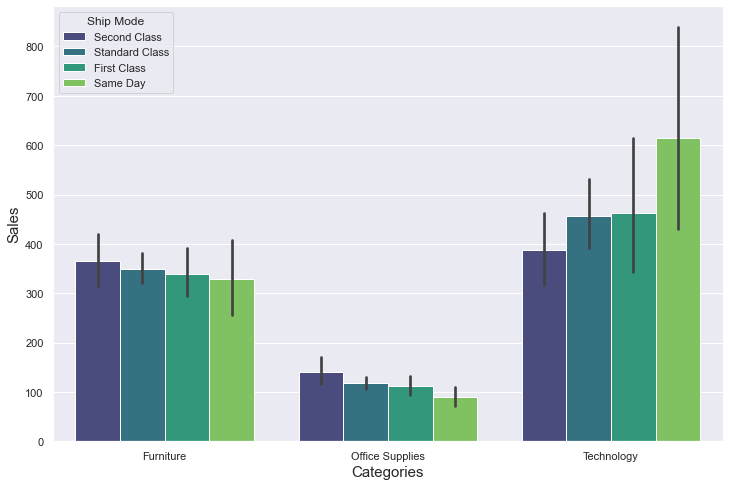

In [76]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Sales",hue="Ship Mode", data=df, palette="viridis")
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

#### Above figure displays Average Sales in different Categories and Ship Mode.